# Ìò∏Ï∂ú

In [86]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import matplotlib.pyplot as plt
import seaborn as sns

# ÏïàÏ†ïÏÑ± ÎπÑÏú® ÌôïÏù∏

In [2]:
# ÌååÏùº Í≤ΩÎ°ú
general_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\ÏùºÎ∞òÎ≥ÄÏàò_ÏïàÏ†ïÏÑ±Ï∂îÍ∞Ä.csv"
sales_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_ÏïàÏ†ïÏÑ±Ï∂îÍ∞Ä.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_general = pd.read_csv(general_path)
df_sales = pd.read_csv(sales_path)

# ÏïàÏ†ïÏÑ± Ïª¨Îüº Í∞íÏùò ÎπÑÏú® Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_ratio(df, column_name="ÏïàÏ†ïÏÑ±"):
    value_counts = df[column_name].value_counts(normalize=True) * 100  # ÎπÑÏú®(%)
    return value_counts

# ÏïàÏ†ïÏÑ± ÎπÑÏú® Í≥ÑÏÇ∞
general_stability_ratio = calculate_ratio(df_general)
sales_stability_ratio = calculate_ratio(df_sales)

# Ï∂úÎ†•
print("ÏùºÎ∞ò Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞ ÏïàÏ†ïÏÑ± ÎπÑÏú®:")
print(general_stability_ratio)
print("\nÎß§Ï∂ú Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞ ÏïàÏ†ïÏÑ± ÎπÑÏú®:")
print(sales_stability_ratio)

ÏùºÎ∞ò Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞ ÏïàÏ†ïÏÑ± ÎπÑÏú®:
ÏïàÏ†ïÏÑ±
Î∂àÏïàÏ†ï    65.495189
ÏïàÏ†ï     34.504811
Name: proportion, dtype: float64

Îß§Ï∂ú Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞ ÏïàÏ†ïÏÑ± ÎπÑÏú®:
ÏïàÏ†ïÏÑ±
Î∂àÏïàÏ†ï    65.822478
ÏïàÏ†ï     34.177522
Name: proportion, dtype: float64


# Î≥ÄÏàò Ï∂îÍ∞Ä

## Îß§Ï∂ú ÌååÏùº Î≥ÄÏàò Ï∂îÍ∞Ä

In [9]:
sales_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_ÏïàÏ†ïÏÑ±Ï∂îÍ∞Ä.csv"

# CP949Î°ú ÏãúÎèÑ
try:
    df_sales = pd.read_csv(sales_path, encoding="cp949")
except UnicodeDecodeError:
    # EUC-KRÎ°ú Îã§Ïãú ÏãúÎèÑ
    df_sales = pd.read_csv(sales_path, encoding="euc-kr")

print(df_sales.head())

     Ïó∞Î∂ÑÍ∏∞            ÏÉÅÍ∂åÎ™Ö  Ï†êÌè¨_Ïàò  Í∞úÏóÖ_Ï†êÌè¨_Ïàò  ÌèêÏóÖ_Ï†êÌè¨_Ïàò  ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Ï†êÌè¨_Ïàò         Îß§Ï∂ú_Í∏àÏï°  \
0  20191   4.19ÎØºÏ£ºÎ¨òÏßÄÏó≠ 2Î≤à    29        0        1           5  2.712070e+08   
1  20191           63ÎπåÎî©    64        1        2           6  1.993332e+08   
2  20191  DMC(ÎîîÏßÄÌÑ∏ÎØ∏ÎîîÏñ¥ÏãúÌã∞)   450       32       37         150  3.050783e+09   
3  20191      GSÍ∞ïÎèôÏûêÏù¥ÏïÑÌååÌä∏    88        6        5          13  5.969977e+08   
4  20191            GÌÉÄÏõå    18        1        0           8  2.236545e+08   

           Îß§Ï∂ú_Í±¥Ïàò  ÏûêÏπòÍµ¨Î™Ö  ÏòÅÏóÖ_Í∞úÏõî_ÌèâÍ∑†  ...  1ÎÖÑÏÉùÏ°¥Î•†  1ÎÖÑÏ∞®Ï∞ΩÏóÖÍ∏∞ÏóÖÏàò  1ÎÖÑÏÉùÏ°¥Í∏∞ÏóÖÏàò  3ÎÖÑÏÉùÏ°¥Î•†  \
0   19354.725490   Í∞ïÎ∂ÅÍµ¨        93  ...     80        20       16   22.2   
1    7275.932785  ÏòÅÎì±Ìè¨Íµ¨        93  ...   88.2        34       30   65.6   
2  158335.952700   ÎßàÌè¨Íµ¨        93  ...   71.3       174      124   44.0   
3   39455.145420   Í∞ïÎèôÍµ¨        93 

In [24]:
import pandas as pd
import chardet

# ÌååÏùº Í≤ΩÎ°ú
sales_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_ÏïàÏ†ïÏÑ±Ï∂îÍ∞Ä.csv"
output_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò.csv"

# Ïù∏ÏΩîÎî© ÏûêÎèô Í∞êÏßÄ
with open(sales_path, "rb") as f:
    result = chardet.detect(f.read(100000))  # ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ
    encoding_type = result["encoding"]

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
try:
    df_sales = pd.read_csv(sales_path, encoding="utf-8")
except UnicodeDecodeError:
    try:
        df_sales = pd.read_csv(sales_path, encoding="utf-8-sig")
    except UnicodeDecodeError:
        df_sales = pd.read_csv(sales_path, encoding="cp949")

# Ïó∞Î∂ÑÍ∏∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
df_sales = df_sales.sort_values(["ÏÉÅÍ∂åÎ™Ö", "Ïó∞Î∂ÑÍ∏∞"])

# 4Í∞ú Î∂ÑÍ∏∞ Í∏∞Ï§Ä rolling Ìï®Ïàò Ï†ÅÏö©
def rolling_std(series):
    return series.rolling(window=4, min_periods=1).std()

# ÏÉàÎ°úÏö¥ Î≥ÄÏàò ÏÉùÏÑ±
df_sales["Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±"] = df_sales.groupby("ÏÉÅÍ∂åÎ™Ö")["Ï†êÌè¨_Ïàò"].transform(rolling_std)
df_sales["ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±"] = df_sales.groupby("ÏÉÅÍ∂åÎ™Ö")["ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Ï†êÌè¨_Ïàò"].transform(rolling_std)

# Ï†êÌè¨ Ï¶ùÍ∞êÎ•† Í≥ÑÏÇ∞ (Ïù¥Ï†Ñ Î∂ÑÍ∏∞ ÎåÄÎπÑ)
df_sales["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"] = df_sales.groupby("ÏÉÅÍ∂åÎ™Ö")["Ï†êÌè¨_Ïàò"].shift(1)
df_sales["Ï†êÌè¨_Ï¶ùÍ∞êÎ•†"] = (df_sales["Ï†êÌè¨_Ïàò"] - df_sales["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"]) / df_sales["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"] * 100
df_sales["Ï†êÌè¨_Î≥ÄÎèôÎüâ"] = df_sales["Ï†êÌè¨_Ïàò"] - df_sales["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"]

# Í∞úÌèêÏóÖ Í∑†Ìòï ÏßÄÏàò Í≥ÑÏÇ∞
df_sales["Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò"] = (df_sales["Í∞úÏóÖ_Ï†êÌè¨_Ïàò"] - df_sales["ÌèêÏóÖ_Ï†êÌè¨_Ïàò"]) / (df_sales["Í∞úÏóÖ_Ï†êÌè¨_Ïàò"] + df_sales["ÌèêÏóÖ_Ï†êÌè¨_Ïàò"] + 1) * 100

# Ï†êÌè¨ ÏÉùÏ°¥Ïú® Í≥ÑÏÇ∞
df_sales["Ï†êÌè¨_ÏÉùÏ°¥Ïú®"] = 1 - (df_sales["ÌèêÏóÖ_Ï†êÌè¨_Ïàò"] / df_sales["Ï†êÌè¨_Ïàò"])

# Îß§Ï∂ú Î≥ÄÎèôÏÑ± (4Í∞ú Î∂ÑÍ∏∞ Í∏∞Ï§Ä)
df_sales["Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±"] = df_sales.groupby("ÏÉÅÍ∂åÎ™Ö")["Îß§Ï∂ú_Í∏àÏï°"].transform(rolling_std)
df_sales["Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±"] = df_sales.groupby("ÏÉÅÍ∂åÎ™Ö")["Îß§Ï∂ú_Í±¥Ïàò"].transform(rolling_std)

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú (Ïù¥Ï†Ñ Î∂ÑÍ∏∞ Ï†êÌè¨ Ïàò)
df_sales.drop(columns=["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"], inplace=True)

# ÌååÏùº Ï†ÄÏû• (utf-8-sig Ïù∏ÏΩîÎî© ÏßÄÏ†ï)
df_sales.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {output_path}")

ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò.csv


## ÏùºÎ∞ò ÌååÏùº Î≥ÄÏàò Ï∂îÍ∞Ä

In [25]:
import pandas as pd
import chardet

# ÌååÏùº Í≤ΩÎ°ú
sales_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\ÏùºÎ∞òÎ≥ÄÏàò_ÏïàÏ†ïÏÑ±Ï∂îÍ∞Ä.csv"
output_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\ÏùºÎ∞òÎ≥ÄÏàò.csv"

# Ïù∏ÏΩîÎî© ÏûêÎèô Í∞êÏßÄ
with open(sales_path, "rb") as f:
    result = chardet.detect(f.read(100000))  # ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ
    encoding_type = result["encoding"]

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
try:
    df_sales = pd.read_csv(sales_path, encoding="utf-8")
except UnicodeDecodeError:
    try:
        df_sales = pd.read_csv(sales_path, encoding="utf-8-sig")
    except UnicodeDecodeError:
        df_sales = pd.read_csv(sales_path, encoding="cp949")

# Ïó∞Î∂ÑÍ∏∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
df_sales = df_sales.sort_values(["ÏÉÅÍ∂åÎ™Ö", "Ïó∞Î∂ÑÍ∏∞"])

# 4Í∞ú Î∂ÑÍ∏∞ Í∏∞Ï§Ä rolling Ìï®Ïàò Ï†ÅÏö©
def rolling_std(series):
    return series.rolling(window=4, min_periods=1).std()

# ÏÉàÎ°úÏö¥ Î≥ÄÏàò ÏÉùÏÑ±
df_sales["Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±"] = df_sales.groupby("ÏÉÅÍ∂åÎ™Ö")["Ï†êÌè¨_Ïàò"].transform(rolling_std)
df_sales["ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±"] = df_sales.groupby("ÏÉÅÍ∂åÎ™Ö")["ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Ï†êÌè¨_Ïàò"].transform(rolling_std)

# Ï†êÌè¨ Ï¶ùÍ∞êÎ•† Í≥ÑÏÇ∞ (Ïù¥Ï†Ñ Î∂ÑÍ∏∞ ÎåÄÎπÑ)
df_sales["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"] = df_sales.groupby("ÏÉÅÍ∂åÎ™Ö")["Ï†êÌè¨_Ïàò"].shift(1)
df_sales["Ï†êÌè¨_Ï¶ùÍ∞êÎ•†"] = (df_sales["Ï†êÌè¨_Ïàò"] - df_sales["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"]) / df_sales["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"] * 100
df_sales["Ï†êÌè¨_Î≥ÄÎèôÎüâ"] = df_sales["Ï†êÌè¨_Ïàò"] - df_sales["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"]

# Í∞úÌèêÏóÖ Í∑†Ìòï ÏßÄÏàò Í≥ÑÏÇ∞
df_sales["Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò"] = (df_sales["Í∞úÏóÖ_Ï†êÌè¨_Ïàò"] - df_sales["ÌèêÏóÖ_Ï†êÌè¨_Ïàò"]) / (df_sales["Í∞úÏóÖ_Ï†êÌè¨_Ïàò"] + df_sales["ÌèêÏóÖ_Ï†êÌè¨_Ïàò"] + 1) * 100

# Ï†êÌè¨ ÏÉùÏ°¥Ïú® Í≥ÑÏÇ∞
df_sales["Ï†êÌè¨_ÏÉùÏ°¥Ïú®"] = 1 - (df_sales["ÌèêÏóÖ_Ï†êÌè¨_Ïàò"] / df_sales["Ï†êÌè¨_Ïàò"])

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú (Ïù¥Ï†Ñ Î∂ÑÍ∏∞ Ï†êÌè¨ Ïàò)
df_sales.drop(columns=["Ïù¥Ï†Ñ_Î∂ÑÍ∏∞_Ï†êÌè¨_Ïàò"], inplace=True)

# ÌååÏùº Ï†ÄÏû• (utf-8-sig Ïù∏ÏΩîÎî© ÏßÄÏ†ï)
df_sales.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {output_path}")

ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\ÏùºÎ∞òÎ≥ÄÏàò.csv


# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

In [28]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# ÏïàÏ†ïÏÑ± Ïª¨ÎüºÏùÑ 1(ÏïàÏ†ï) / 0(Î∂àÏïàÏ†ï)ÏúºÎ°ú Î≥ÄÌôò
df["ÏïàÏ†ïÏÑ±(ÏàòÏπòÌòï)"] = df["ÏïàÏ†ïÏÑ±"].map({"ÏïàÏ†ï": 1, "Î∂àÏïàÏ†ï": 0})

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ ÎåÄÏÉÅ Ïª¨Îüº Î¶¨Ïä§Ìä∏
target_columns = [
    "Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±", "Ï†êÌè¨_Î≥ÄÎèôÎüâ", "Ï†êÌè¨_Ï¶ùÍ∞êÎ•†", "ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±",
    "Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò", "Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±", "Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±", "1ÎÖÑÏÉùÏ°¥Î•†", "5ÎÖÑÏÉùÏ°¥Î•†"
]

# Ïà´ÏûêÎ°ú Î≥ÄÌôò (Î¨∏ÏûêÍ∞í '-' Îì±ÏùÑ NaNÏúºÎ°ú Î≥ÄÌôò)
df[target_columns] = df[target_columns].apply(pd.to_numeric, errors="coerce")

# NaN ÌôïÏù∏ Î∞è Ï≤òÎ¶¨
print(df[target_columns].isna().sum())  # NaN Í∞úÏàò ÌôïÏù∏
df.fillna(0, inplace=True)  # NaNÏùÑ 0ÏúºÎ°ú ÎåÄÏ≤¥

# ÏïàÏ†ïÏÑ±Í≥º Í∞Å Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation_results = df[target_columns].corrwith(df["ÏïàÏ†ïÏÑ±(ÏàòÏπòÌòï)"])

# Ï∂úÎ†•
print(correlation_results)

Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±      27
Ï†êÌè¨_Î≥ÄÎèôÎüâ        27
Ï†êÌè¨_Ï¶ùÍ∞êÎ•†        53
ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±     27
Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò      0
Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±     27
Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±     27
1ÎÖÑÏÉùÏ°¥Î•†        176
5ÎÖÑÏÉùÏ°¥Î•†        103
dtype: int64
Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±     0.010516
Ï†êÌè¨_Î≥ÄÎèôÎüâ      -0.018428
Ï†êÌè¨_Ï¶ùÍ∞êÎ•†            NaN
ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±   -0.086391
Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò    0.000890
Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±   -0.013418
Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±   -0.027515
1ÎÖÑÏÉùÏ°¥Î•†        0.102261
5ÎÖÑÏÉùÏ°¥Î•†        0.186578
dtype: float64


c:\Users\m\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


## null Ìè¨Ìï® Ìñâ Ï†úÍ±∞

In [29]:
import numpy as np

# ÏïàÏ†ïÏÑ± Ïª¨ÎüºÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (ÏïàÏ†ï: 1, Î∂àÏïàÏ†ï: 0)
df["ÏïàÏ†ïÏÑ±(ÏàòÏπòÌòï)"] = df["ÏïàÏ†ïÏÑ±"].map({"ÏïàÏ†ï": 1, "Î∂àÏïàÏ†ï": 0})

# infÏôÄ NaN Í∞í Ï†úÍ±∞
df_filtered = df.replace([np.inf, -np.inf], np.nan).dropna()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞Ìï† Ïª¨Îüº Î™©Î°ù
target_columns = [
    "ÏïàÏ†ïÏÑ±(ÏàòÏπòÌòï)", "Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±", "Ï†êÌè¨_Î≥ÄÎèôÎüâ", "Ï†êÌè¨_Ï¶ùÍ∞êÎ•†", "ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±",
    "Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò", "Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±", "Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±", "1ÎÖÑÏÉùÏ°¥Î•†", "5ÎÖÑÏÉùÏ°¥Î•†"
]

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞
correlation_matrix = df_filtered[target_columns].corr()

# Ï∂úÎ†•
print(correlation_matrix)

           ÏïàÏ†ïÏÑ±(ÏàòÏπòÌòï)  Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±    Ï†êÌè¨_Î≥ÄÎèôÎüâ    Ï†êÌè¨_Ï¶ùÍ∞êÎ•†  ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±  Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò  \
ÏïàÏ†ïÏÑ±(ÏàòÏπòÌòï)   1.000000  0.010569 -0.018448  0.020516  -0.086291   0.000650   
Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±   0.010569  1.000000 -0.056321  0.041183   0.400663  -0.003121   
Ï†êÌè¨_Î≥ÄÎèôÎüâ    -0.018448 -0.056321  1.000000  0.267431   0.016181   0.193269   
Ï†êÌè¨_Ï¶ùÍ∞êÎ•†     0.020516  0.041183  0.267431  1.000000  -0.009269   0.164166   
ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ± -0.086291  0.400663  0.016181 -0.009269   1.000000   0.007954   
Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò  0.000650 -0.003121  0.193269  0.164166   0.007954   1.000000   
Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ± -0.013353  0.179526  0.005789 -0.016202   0.236497  -0.005640   
Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ± -0.027533  0.112988  0.014901 -0.012531   0.223436   0.012737   
1ÎÖÑÏÉùÏ°¥Î•†      0.102152  0.027403  0.006065  0.020602   0.003083   0.041831   
5ÎÖÑÏÉùÏ°¥Î•†      0.186650  0.060404 -0.009031  0.013664  -0.0319

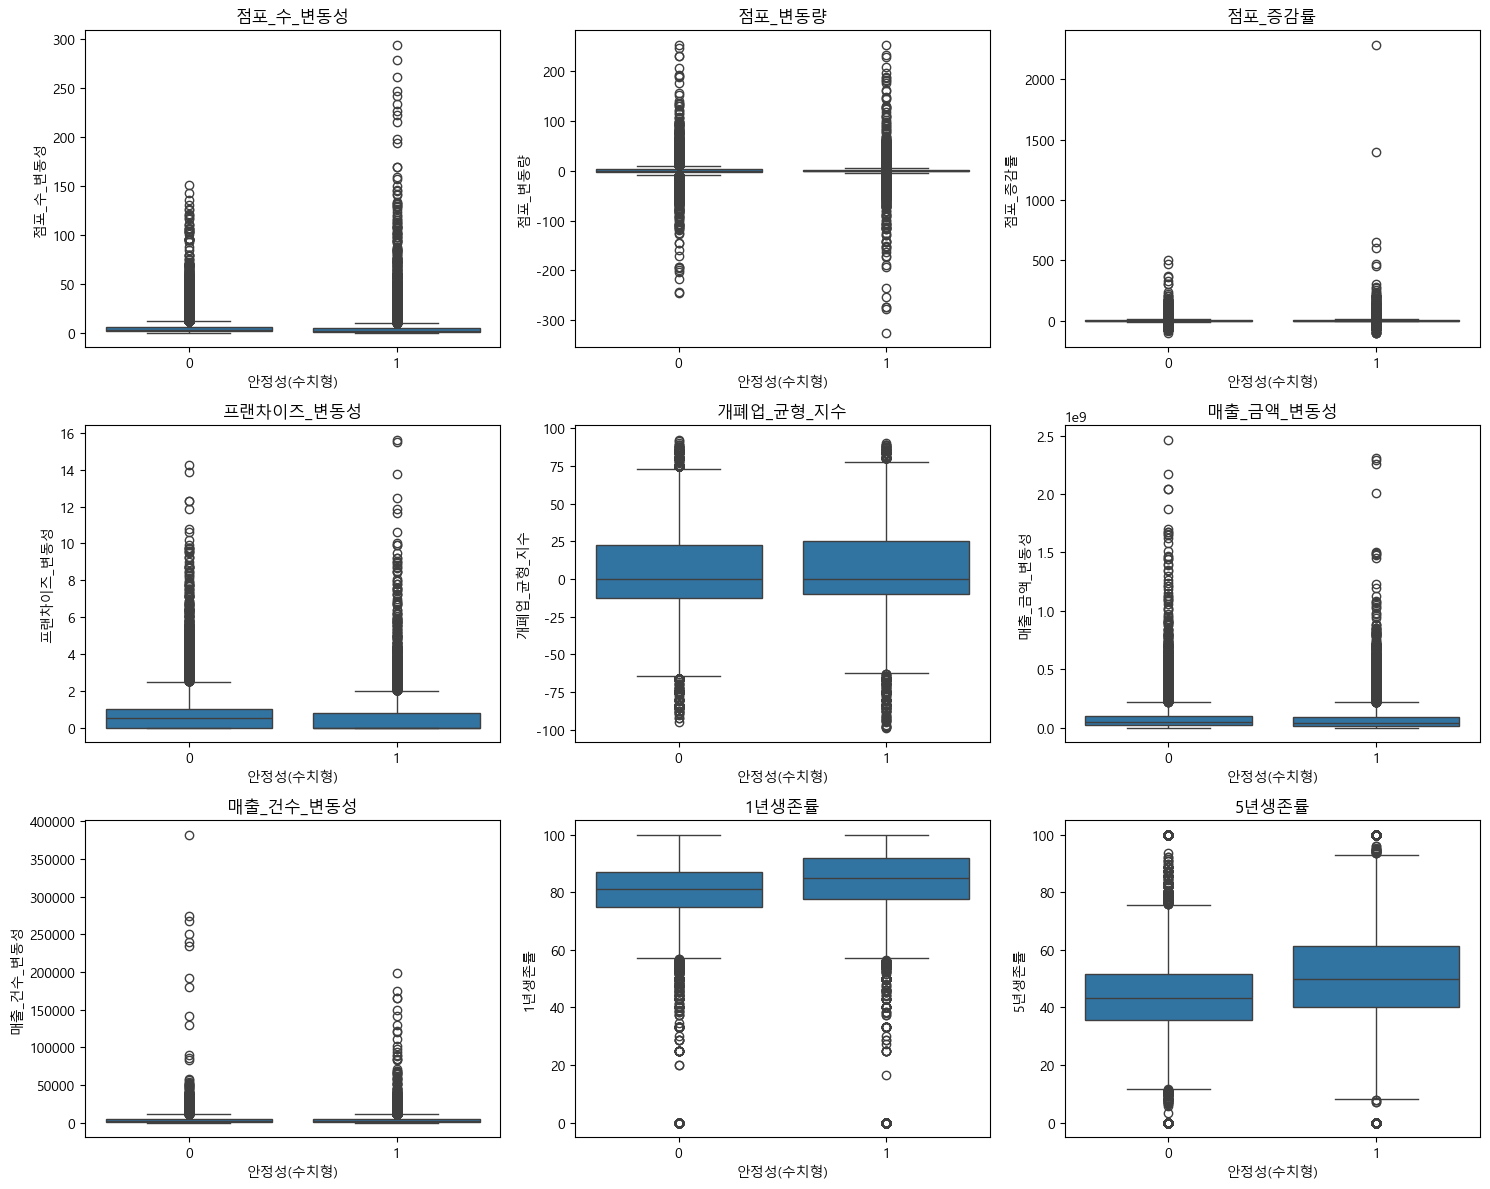

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# infÏôÄ NaN Í∞í Ï≤òÎ¶¨
df_filtered = df.replace([np.inf, -np.inf], np.nan).dropna()

# ÏïàÏ†ïÏÑ± Ïª¨ÎüºÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (ÏïàÏ†ï=1, Î∂àÏïàÏ†ï=0)
df_filtered["ÏïàÏ†ïÏÑ±(ÏàòÏπòÌòï)"] = df_filtered["ÏïàÏ†ïÏÑ±"].map({"ÏïàÏ†ï": 1, "Î∂àÏïàÏ†ï": 0})

# ÎπÑÍµêÌï† Î≥ÄÏàò Î™©Î°ù
variables = ["Ï†êÌè¨_Ïàò_Î≥ÄÎèôÏÑ±", "Ï†êÌè¨_Î≥ÄÎèôÎüâ", "Ï†êÌè¨_Ï¶ùÍ∞êÎ•†", "ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±",
             "Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò", "Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±", "Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±", "1ÎÖÑÏÉùÏ°¥Î•†", "5ÎÖÑÏÉùÏ°¥Î•†"]

# Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(15, 12))

# Î≥ÄÏàòÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø Ï∂úÎ†•
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # 3x3 Í∑∏Î¶¨ÎìúÎ°ú Í∑∏ÎûòÌîÑ Î∞∞Ïπò
    sns.boxplot(x="ÏïàÏ†ïÏÑ±(ÏàòÏπòÌòï)", y=var, data=df_filtered)
    plt.title(var)

plt.tight_layout()  # Í∑∏ÎûòÌîÑ Í∞ÑÍ≤© ÏûêÎèô Ï°∞Ï†à
plt.show()

# PCA

## PCA 1

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.decomposition import PCA

# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò', '3ÎÖÑÏÉùÏ°¥Î•†', 'Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# Î°úÍ∑∏ Î≥ÄÌôò (ÏùåÏàò Î∞©ÏßÄ)
for feature in features:
    min_val = df_selected[feature].min()
    if min_val < 0:
        df_selected[feature] = df_selected[feature] - min_val + 1  # ÏµúÏÜåÍ∞íÏùÑ 1Î°ú Ï°∞Ï†ï
    df_selected[feature] = np.log1p(df_selected[feature])  # log(1 + x) Ï†ÅÏö©

# Ï†ïÍ∑úÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# Ï†ïÍ∑úÎ∂ÑÌè¨ Î≥ÄÌôò (QuantileTransformer)
qt = QuantileTransformer(output_distribution='normal', random_state=42)
normalized_features = qt.fit_transform(scaled_features)

# PCA ÏàòÌñâ
pca = PCA(n_components=1)
pca_result = pca.fit_transform(normalized_features)

# Í∑†Ïùº Î∂ÑÌè¨ Î≥ÄÌôò ÌõÑ 0~20 Ïä§ÏºÄÏùºÎßÅ
qt_uniform = QuantileTransformer(output_distribution='uniform', random_state=42)
final_scores = qt_uniform.fit_transform(pca_result) * 20

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)


          ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
525    Î™©ÎèôÏã†ÏãúÍ∞ÄÏßÄ  20.000000
171   Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄ  19.980809
45        Í∞ïÎÇ®Ïó≠  19.973299
1433      ÌïúÌã∞Ïó≠  19.959976
291       ÎÖ∏ÏõêÏó≠  19.948697
...       ...        ...
628      Î∂ÅÏ†ïÎßàÏùÑ   0.057942
864    ÏàòÏÉâÏó≠ 1Î≤à   0.040027
1282     Ï°∞ÏñëÏãúÏû•   0.026352
237   Í∏∏ÏùåÏó≠ 10Î≤à   0.013314
1114   ÏòÅÏßÑÏãúÏû•AÎèô   0.000000

[1502 rows x 2 columns]


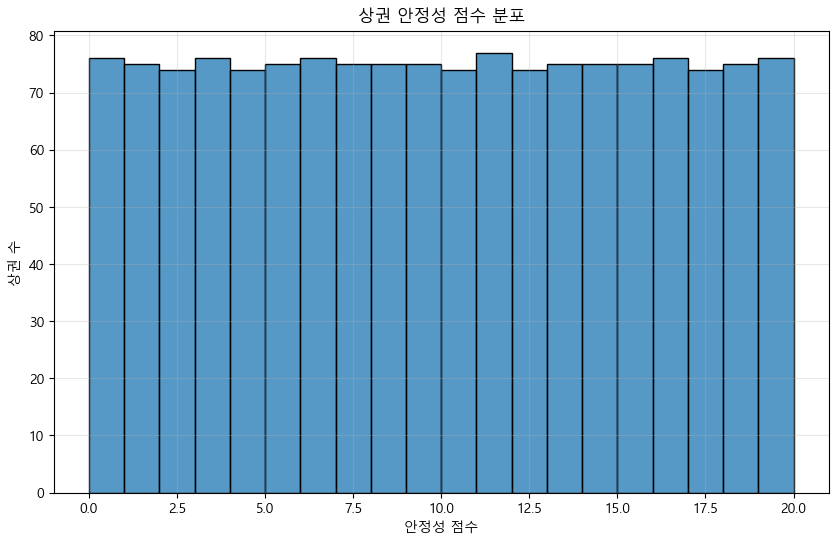

In [11]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [12]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.6909


## PCA2

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.decomposition import PCA

# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# Î°úÍ∑∏ Î≥ÄÌôò (ÏùåÏàò Î∞©ÏßÄ)
for feature in features:
    min_val = df_selected[feature].min()
    if min_val < 0:
        df_selected[feature] = df_selected[feature] - min_val + 1  # ÏµúÏÜåÍ∞íÏùÑ 1Î°ú Ï°∞Ï†ï
    df_selected[feature] = np.log1p(df_selected[feature])  # log(1 + x) Ï†ÅÏö©

# Ï†ïÍ∑úÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# Ï†ïÍ∑úÎ∂ÑÌè¨ Î≥ÄÌôò (QuantileTransformer)
qt = QuantileTransformer(output_distribution='normal', random_state=42)
normalized_features = qt.fit_transform(scaled_features)

# PCA ÏàòÌñâ
pca = PCA(n_components=1)
pca_result = pca.fit_transform(normalized_features)

# Í∑†Ïùº Î∂ÑÌè¨ Î≥ÄÌôò ÌõÑ 0~20 Ïä§ÏºÄÏùºÎßÅ
qt_uniform = QuantileTransformer(output_distribution='uniform', random_state=42)
final_scores = qt_uniform.fit_transform(pca_result) * 20

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

                  ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
525            Î™©ÎèôÏã†ÏãúÍ∞ÄÏßÄ  20.000000
171           Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄ  19.980231
45                Í∞ïÎÇ®Ïó≠  19.975871
291               ÎÖ∏ÏõêÏó≠  19.960064
1433              ÌïúÌã∞Ïó≠  19.941128
...               ...        ...
911            Ïã†ÎÇ¥ICÎ∂ÅÏ∏°   0.052337
321           ÎãπÏÇ∞Ïó≠ 13Î≤à   0.040009
770             ÏÑúÏ¥àÏÜåÎ∞©ÏÑú   0.029515
363   ÎèÑÍ≥°2ÎèôÏ£ºÎØºÏÑºÌÑ∞(ÎåÄÏπòÏ§ëÌïôÍµê)   0.018607
1441           ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ   0.000000

[1502 rows x 2 columns]


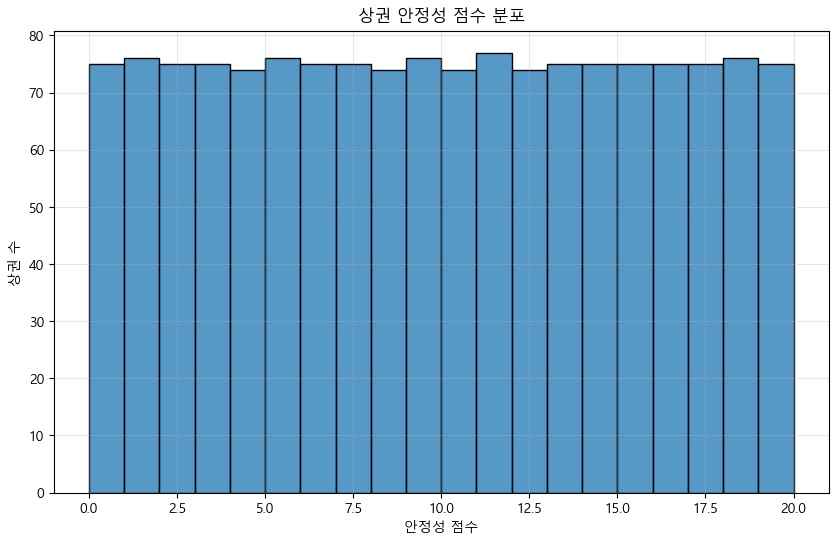

In [14]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [15]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.7200


# Îã§Ïãú PCA

## PCA1 - Ïú†ÎãàÌèº ÏóÜÏù¥

### 1) Ï†ïÍ∑úÌôî => Ï†ïÍ∑úÎ∂ÑÌè¨ => PCA => Ïä§ÏºÄÏùºÎßÅ

In [51]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# Î°úÍ∑∏ Î≥ÄÌôò (ÏùåÏàò Î∞©ÏßÄ)
for feature in features:
    min_val = df_selected[feature].min()
    if min_val < 0:
        df_selected[feature] = df_selected[feature] + abs(min_val) + 1  # ÏµúÏÜåÍ∞íÏùÑ ÏñëÏàòÎ°ú Ï°∞Ï†ï
    df_selected[feature] = np.log1p(df_selected[feature])  # log(1 + x) Ï†ÅÏö©

# Ï†ïÍ∑úÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# Ï†ïÍ∑úÎ∂ÑÌè¨ Î≥ÄÌôò (QuantileTransformer)
qt = QuantileTransformer(output_distribution='normal', random_state=42)
normalized_features = qt.fit_transform(scaled_features)

# PCA ÏàòÌñâ
pca = PCA(n_components=1)
pca_result = pca.fit_transform(normalized_features).flatten()

# 0~20 Ïä§ÏºÄÏùºÎßÅ (Min-Max Scaling Ï†ÅÏö©)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(pca_result.reshape(-1, 1)).flatten()

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

                     ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
525               Î™©ÎèôÏã†ÏãúÍ∞ÄÏßÄ  20.000000
171              Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄ  16.135382
45                   Í∞ïÎÇ®Ïó≠  15.943987
291                  ÎÖ∏ÏõêÏó≠  15.620552
1433                 ÌïúÌã∞Ïó≠  15.476208
...                  ...        ...
249   ÎÇôÏõêÏãúÏû•(ÎÇôÏõêÏßÄÌïòÏãúÏû•(ÎåÄÏùºÏÉÅÍ∞Ä))   0.009045
737               ÏÑúÏö∏ÍµêÌÜµÍ≥µÏÇ¨   0.009045
1360             Ï≤≠ÎüâÎ¶¨ÏàòÏÇ∞ÏãúÏû•   0.009045
1240     Ïû•ÎØ∏Ï†úÏùºÏãúÏû•(Ï§ëÌôîÎèôÏ†úÏùºÏãúÏû•)   0.000000
1151              Ïö©ÎëêÏ¥àÎì±ÌïôÍµê   0.000000

[1502 rows x 2 columns]


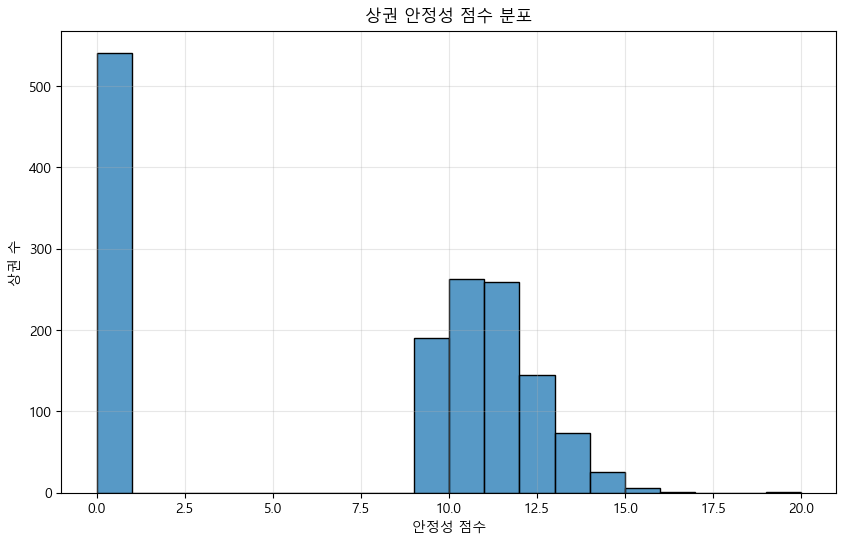

In [52]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [31]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.7366


### 2) Ï†ïÍ∑úÌôî => PCA => Ï†ïÍ∑úÎ∂ÑÌè¨ => Ïä§ÏºÄÏùºÎßÅ

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler
from sklearn.decomposition import PCA

# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# Î°úÍ∑∏ Î≥ÄÌôò (ÏùåÏàò Î∞©ÏßÄ)
for feature in features:
    min_val = df_selected[feature].min()
    if min_val < 0:
        df_selected[feature] = df_selected[feature] + abs(min_val) + 1  # ÏµúÏÜåÍ∞íÏùÑ ÏñëÏàòÎ°ú Ï°∞Ï†ï
    df_selected[feature] = np.log1p(df_selected[feature])  # log(1 + x) Ï†ÅÏö©

# Ï†ïÍ∑úÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# Ï†ïÍ∑úÎ∂ÑÌè¨ Î≥ÄÌôò (QuantileTransformer)
qt = QuantileTransformer(output_distribution='normal', random_state=42)
normalized_features = qt.fit_transform(scaled_features)

# PCA ÏàòÌñâ
pca = PCA(n_components=1)
pca_result = pca.fit_transform(normalized_features).flatten()

# Ï†ïÍ∑ú Î∂ÑÌè¨ Î≥ÄÌôò (QuantileTransformer Ï†ÅÏö©)
pca_normalized = qt.fit_transform(pca_result.reshape(-1, 1)).flatten()

# 0~20 Ïä§ÏºÄÏùºÎßÅ (Min-Max Scaling Ï†ÅÏö©)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(pca_normalized.reshape(-1, 1)).flatten()

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

                     ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
525               Î™©ÎèôÏã†ÏãúÍ∞ÄÏßÄ  20.000000
171              Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄ  15.956968
45                   Í∞ïÎÇ®Ïó≠  15.825055
291                  ÎÖ∏ÏõêÏó≠  15.535547
1433                 ÌïúÌã∞Ïó≠  15.355329
...                  ...        ...
249   ÎÇôÏõêÏãúÏû•(ÎÇôÏõêÏßÄÌïòÏãúÏû•(ÎåÄÏùºÏÉÅÍ∞Ä))   4.601790
737               ÏÑúÏö∏ÍµêÌÜµÍ≥µÏÇ¨   4.601790
1360             Ï≤≠ÎüâÎ¶¨ÏàòÏÇ∞ÏãúÏû•   4.601790
1240     Ïû•ÎØ∏Ï†úÏùºÏãúÏû•(Ï§ëÌôîÎèôÏ†úÏùºÏãúÏû•)   0.000000
1151              Ïö©ÎëêÏ¥àÎì±ÌïôÍµê   0.000000

[1502 rows x 2 columns]


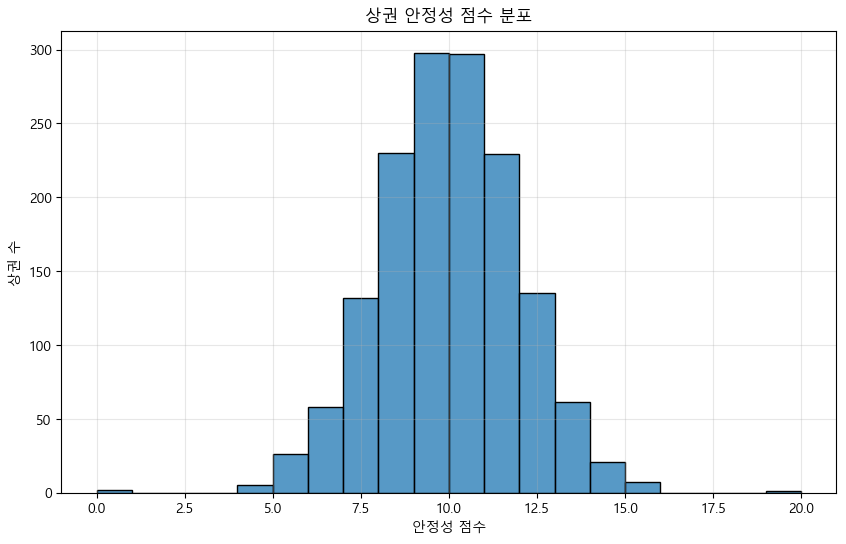

In [35]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [36]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.7366


### 3) Ï†ïÍ∑úÌôî ÏóÜÏù¥ PCA ÌõÑ ÎØºÎß•Ïä§ Ïä§ÏºÄÏùºÎßÅ

In [53]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# Î°úÍ∑∏ Î≥ÄÌôò (ÏùåÏàò Î∞©ÏßÄ)
for feature in features:
    min_val = df_selected[feature].min()
    if min_val < 0:
        df_selected[feature] = df_selected[feature] + abs(min_val) + 1  # ÏµúÏÜåÍ∞íÏùÑ ÏñëÏàòÎ°ú Ï°∞Ï†ï
    df_selected[feature] = np.log1p(df_selected[feature])  # log(1 + x) Ï†ÅÏö©

# PCA ÏàòÌñâ
pca = PCA(n_components=1)
pca_result = pca.fit_transform(df_selected[features]).flatten()

# 0~20 Ïä§ÏºÄÏùºÎßÅ (Min-Max Scaling Ï†ÅÏö©)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(pca_result.reshape(-1, 1)).flatten()

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

               ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
33          Í∞ÄÏ¢åÏó≠ 3Î≤à  20.000000
1006     ÏïÑÌòÑÍ∞ÄÍµ¨Í±∞Î¶¨ÏÉÅÏ†êÍ∞Ä  19.619085
832            ÏÑ∏Í≤ÄÏ†ï  19.373635
1152     Ïö©ÎëêÌù¨ÎßùÏñ¥Î¶∞Ïù¥Í≥µÏõê  19.369620
1245  Ïû•Ïã†Íµ¨ ÌäπÌôîÍ±∞Î¶¨ ÏÉÅÏ†êÍ∞Ä  19.273729
...            ...        ...
1078       Ïó∞Ìù¨Ïñ¥Î¶∞Ïù¥Í≥µÏõê   0.139081
1441        ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ   0.139081
913   Ïã†ÎÖ∏ÎüâÏßÑÏãúÏû•(Í∏∞Îä•ÏÉÅÏã§)   0.139081
631     Î∂ÅÌïúÏÇ∞Î≥¥Íµ≠Î¨∏Ïó≠ 1Î≤à   0.062254
1468        ÌôîÍ≥ÑÏó≠ 2Î≤à   0.000000

[1502 rows x 2 columns]


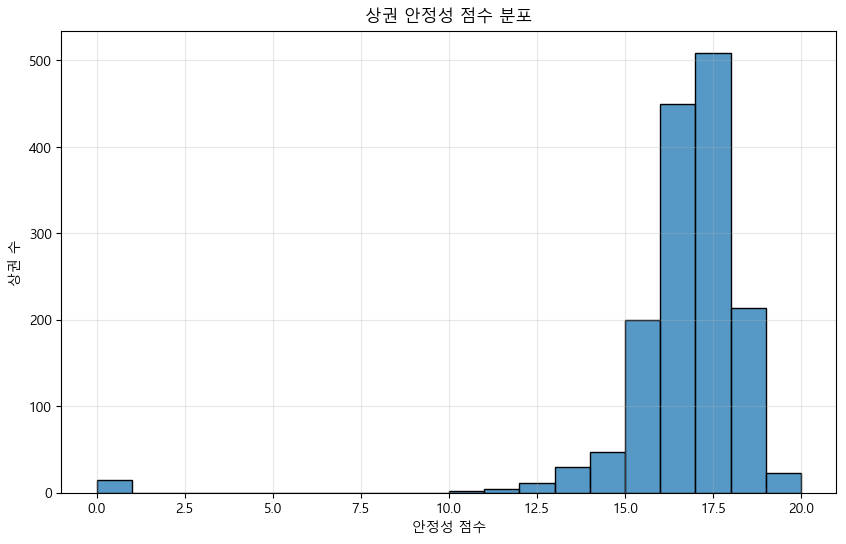

In [54]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [55]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.4146


### 4) Ï†ïÍ∑úÌôî ÏóÜÏù¥ Î≥ÄÏàò ÌëúÏ§ÄÌôî ÌõÑ ÎØºÎß•Ïä§ Ïä§ÏºÄÏùºÎßÅ

In [56]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# Î°úÍ∑∏ Î≥ÄÌôò (ÏùåÏàò Î∞©ÏßÄ)
for feature in features:
    min_val = df_selected[feature].min()
    if min_val < 0:
        df_selected[feature] = df_selected[feature] + abs(min_val) + 1  # ÏµúÏÜåÍ∞íÏùÑ ÏñëÏàòÎ°ú Ï°∞Ï†ï
    df_selected[feature] = np.log1p(df_selected[feature])  # log(1 + x) Ï†ÅÏö©

# Î≥ÄÏàò ÌëúÏ§ÄÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_selected[features])

# PCA ÏàòÌñâ
pca = PCA(n_components=1)
pca_result = pca.fit_transform(standardized_features).flatten()

# 0~20 Ïä§ÏºÄÏùºÎßÅ (Min-Max Scaling Ï†ÅÏö©)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(pca_result.reshape(-1, 1)).flatten()

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

               ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
525         Î™©ÎèôÏã†ÏãúÍ∞ÄÏßÄ  20.000000
1433           ÌïúÌã∞Ïó≠  19.735400
45             Í∞ïÎÇ®Ïó≠  19.507773
171        Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄ  19.443319
291            ÎÖ∏ÏõêÏó≠  19.431494
...            ...        ...
1441        ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ   0.221996
1162          Ïö∞Î¶ºÏãúÏû•   0.221996
409   ÎèôÎåÄÎ¨∏Ï§ëÏïôÏÉàÎßàÏùÑÍ∏àÍ≥†Î≥∏Ï†ê   0.221996
631     Î∂ÅÌïúÏÇ∞Î≥¥Íµ≠Î¨∏Ïó≠ 1Î≤à   0.099368
1468        ÌôîÍ≥ÑÏó≠ 2Î≤à   0.000000

[1502 rows x 2 columns]


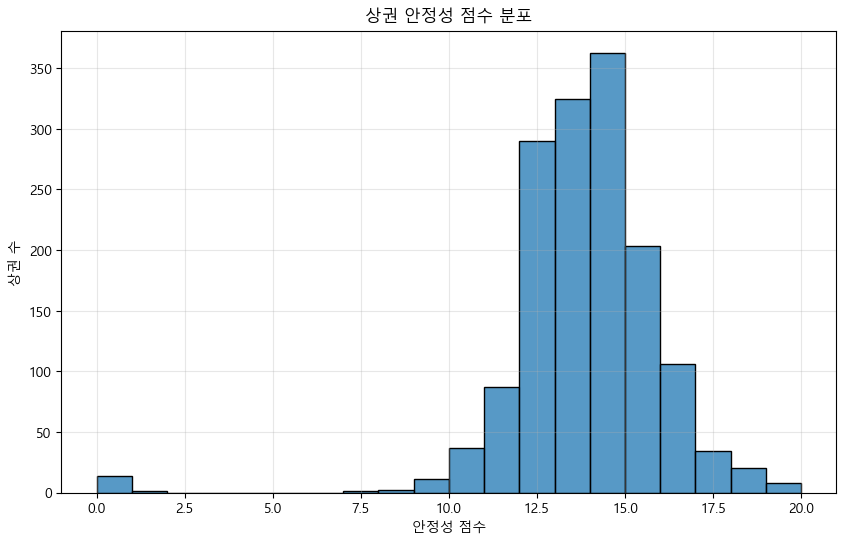

In [57]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [58]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.3626


## PCA2 Ï†ïÍ∑úÌôî X

### ÌëúÏ§ÄÌôî => PCA => ÎØºÎß•Ïä§

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# ÌëúÏ§ÄÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 1Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_features)

# Min-Max Ïä§ÏºÄÏùºÎßÅ (0~20 Î≤îÏúÑ)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(pca_result)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

               ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
525         Î™©ÎèôÏã†ÏãúÍ∞ÄÏßÄ  20.000000
1236           Ïû†Ïã§Ïó≠  17.719472
291            ÎÖ∏ÏõêÏó≠  17.063688
1182  ÏùÄÏ≤úÏ¥àÎì±ÌïôÍµê(ÏùÄÏ≤úÍµêÏïû)  17.055939
45             Í∞ïÎÇ®Ïó≠  16.931362
...            ...        ...
1162          Ïö∞Î¶ºÏãúÏû•   0.039604
343         ÎåÄÏã†Í≥†Îì±ÌïôÍµê   0.027508
1094     ÏòÅÎì±Ìè¨Î≥∏ÎèôÏ£ºÎØºÏÑºÌÑ∞   0.014613
1282          Ï°∞ÏñëÏãúÏû•   0.001005
1441        ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ   0.000000

[1502 rows x 2 columns]


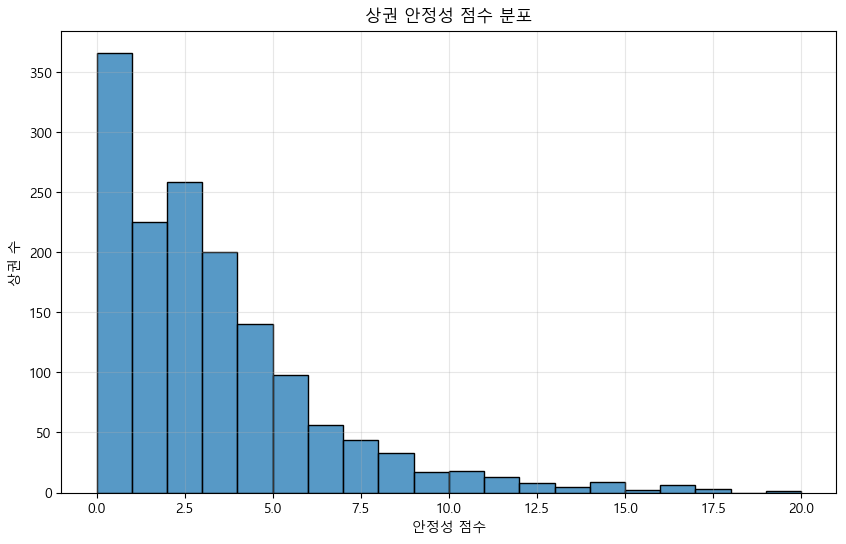

In [60]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [61]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.4550


### PCA => ÌëúÏ§ÄÌôî => ÎØºÎß•Ïä§

In [62]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 1Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(df_selected[features])

# ÌëúÏ§ÄÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
standardized_pca = scaler.fit_transform(pca_result)

# Min-Max Ïä§ÏºÄÏùºÎßÅ (0~20 Î≤îÏúÑ)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(standardized_pca)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

                              ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
98                         Í≤ΩÏàòÏ¥àÎì±ÌïôÍµê  20.000000
782                      ÏÑùÏ¥åÍ≥†Î∂ÑÏó≠ 3Î≤à  19.954665
298                           ÎÖºÌòÑÏó≠  19.773585
1182                 ÏùÄÏ≤úÏ¥àÎì±ÌïôÍµê(ÏùÄÏ≤úÍµêÏïû)  18.758776
1341  Ï≤úÏôïÏó≠ 3Î≤à(Ïò§Î•ò2ÎèôÏ£ºÎØºÏÑºÌÑ∞, ÏÑúÏö∏Ïò§Î•òÎÇ®Ï¥àÎì±ÌïôÍµê)  15.772674
...                           ...        ...
1320                       Ï§ëÏïôÎ≥¥ÌõàÎ≥ëÏõê   0.002158
712                         ÏÉàÏÑùÍ¥ÄÏãúÏû•   0.001786
1282                         Ï°∞ÏñëÏãúÏû•   0.001371
770                         ÏÑúÏ¥àÏÜåÎ∞©ÏÑú   0.000549
1441                       ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ   0.000000

[1502 rows x 2 columns]


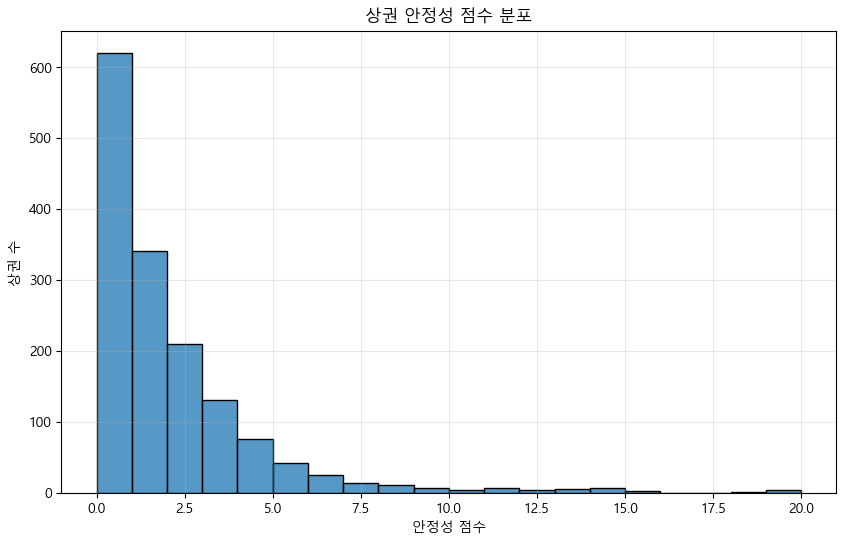

In [63]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [64]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 1.0000


### ÎØºÎß•Ïä§ => PCA

In [65]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# Min-Max Ïä§ÏºÄÏùºÎßÅ (0~20 Î≤îÏúÑ)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
scaled_features = minmax_scaler.fit_transform(df_selected[features])

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 1Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_features)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': pca_result.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

            ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
33       Í∞ÄÏ¢åÏó≠ 3Î≤à   8.591191
832         ÏÑ∏Í≤ÄÏ†ï   8.346175
1006  ÏïÑÌòÑÍ∞ÄÍµ¨Í±∞Î¶¨ÏÉÅÏ†êÍ∞Ä   8.345449
1010     ÏïÑÌòÑÏó≠ 4Î≤à   8.318075
1152  Ïö©ÎëêÌù¨ÎßùÏñ¥Î¶∞Ïù¥Í≥µÏõê   8.303551
...         ...        ...
1162       Ïö∞Î¶ºÏãúÏû• -11.769065
343      ÎåÄÏã†Í≥†Îì±ÌïôÍµê -11.769601
1094  ÏòÅÎì±Ìè¨Î≥∏ÎèôÏ£ºÎØºÏÑºÌÑ∞ -11.770172
1282       Ï°∞ÏñëÏãúÏû• -11.770774
1441     ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ -11.770818

[1502 rows x 2 columns]


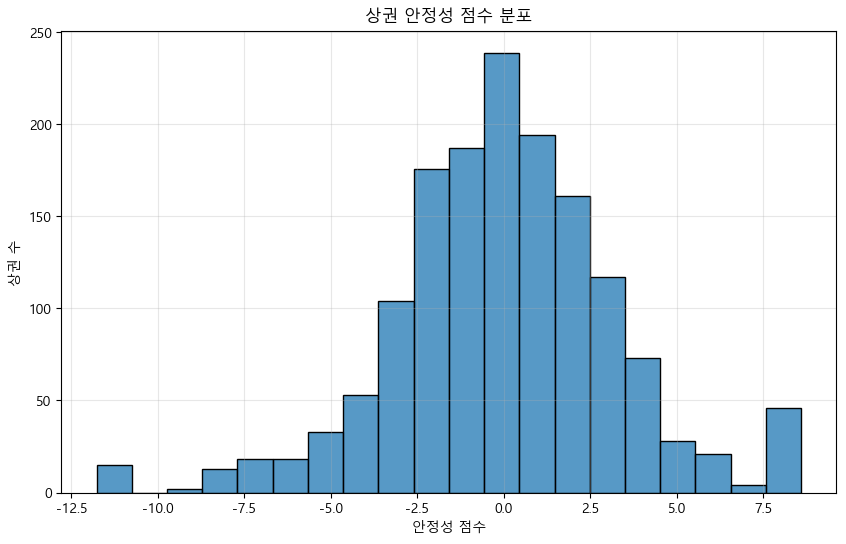

In [66]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [67]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.4599


### PCA => Ï†úÍ≥± => ÎØºÎß•Ïä§

In [68]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 1Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(df_selected[features])

# Í∞í Ï†úÍ≥± Î≥ÄÌôò
squared_pca = np.square(pca_result)

# Min-Max Ïä§ÏºÄÏùºÎßÅ (0~20 Î≤îÏúÑ)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(squared_pca)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

                              ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
98                         Í≤ΩÏàòÏ¥àÎì±ÌïôÍµê  20.000000
782                      ÏÑùÏ¥åÍ≥†Î∂ÑÏó≠ 3Î≤à  19.899068
298                           ÎÖºÌòÑÏó≠  19.498469
1182                 ÏùÄÏ≤úÏ¥àÎì±ÌïôÍµê(ÏùÄÏ≤úÍµêÏïû)  17.328813
1341  Ï≤úÏôïÏó≠ 3Î≤à(Ïò§Î•ò2ÎèôÏ£ºÎØºÏÑºÌÑ∞, ÏÑúÏö∏Ïò§Î•òÎÇ®Ï¥àÎì±ÌïôÍµê)  11.686626
...                           ...        ...
596               Î∞∞ÌôîÏó¨ÏûêÎåÄÌïôÍµê(Î∞ïÎÖ∏ÏàòÎØ∏Ïà†Í¥Ä)   0.000005
180              Íµ¨Î¶ΩÎåÄÌïôÍ≤ΩÎ°úÎãπ(Í¥ÄÏïÖÏÇ∞ÏÉòÎßêÍ≥µÏõê)   0.000003
58                          Í∞ïÎ∂ÅÏ§ëÌïôÍµê   0.000002
928                          Ïã†ÎèÑÎ¶ºÏó≠   0.000001
1157                       Ïö©ÏÇ∞Ïö©Î¨∏ÏãúÏû•   0.000000

[1502 rows x 2 columns]


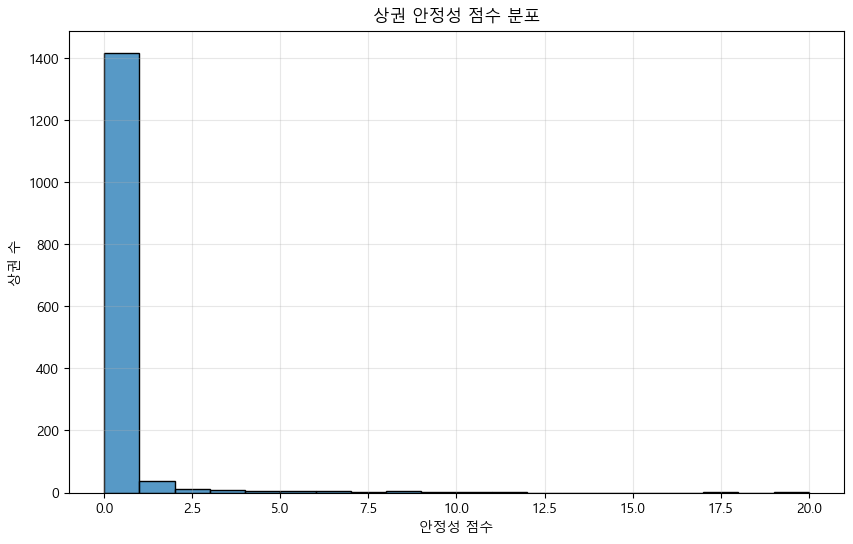

In [69]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [70]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 1.0000


### ÎØºÎß•Ïä§ => PCA => ÎØºÎß•Ïä§

In [71]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# Min-Max Ïä§ÏºÄÏùºÎßÅ (0~1 Î≤îÏúÑ)
minmax_scaler = MinMaxScaler()
scaled_features = minmax_scaler.fit_transform(df_selected[features])

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 1Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_features)

# Min-Max Ïä§ÏºÄÏùºÎßÅ (0~20 Î≤îÏúÑ)
final_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = final_scaler.fit_transform(pca_result)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

            ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
33       Í∞ÄÏ¢åÏó≠ 3Î≤à  20.000000
832         ÏÑ∏Í≤ÄÏ†ï  19.759340
1006  ÏïÑÌòÑÍ∞ÄÍµ¨Í±∞Î¶¨ÏÉÅÏ†êÍ∞Ä  19.758627
1010     ÏïÑÌòÑÏó≠ 4Î≤à  19.731740
1152  Ïö©ÎëêÌù¨ÎßùÏñ¥Î¶∞Ïù¥Í≥µÏõê  19.717474
...         ...        ...
1162       Ïö∞Î¶ºÏãúÏû•   0.001722
343      ÎåÄÏã†Í≥†Îì±ÌïôÍµê   0.001196
1094  ÏòÅÎì±Ìè¨Î≥∏ÎèôÏ£ºÎØºÏÑºÌÑ∞   0.000635
1282       Ï°∞ÏñëÏãúÏû•   0.000044
1441     ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ   0.000000

[1502 rows x 2 columns]


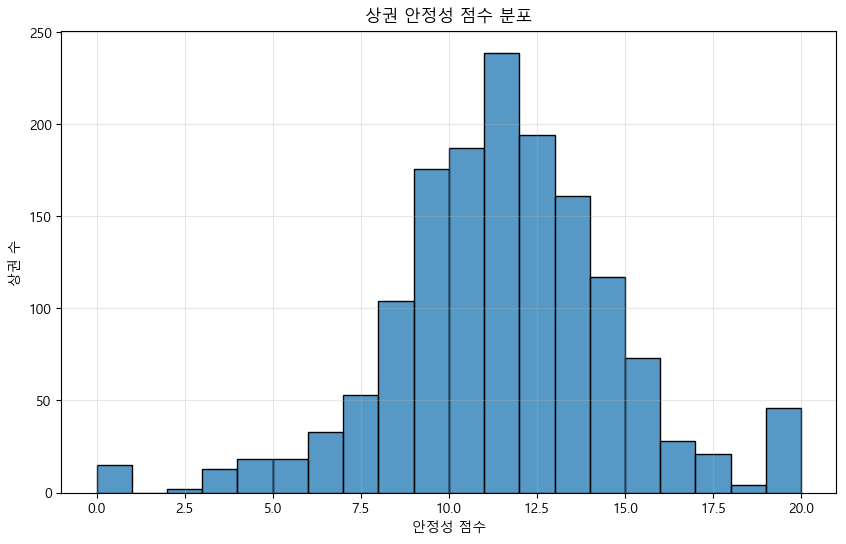

In [72]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

In [73]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.4599


### ÌëúÏ§ÄÌôî => PCA(Ï£ºÏÑ±Î∂Ñ 2Í∞ú) => ÎØºÎß•Ïä§ **ÏÇ¨Ïö©ÏΩîÎìú**

In [101]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# ÌëúÏ§ÄÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 2Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
explained_variance = pca.explained_variance_ratio_

# Ï£ºÏÑ±Î∂Ñ Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
weighted_pca_score = (pca_result[:, 0] * explained_variance[0]) + (pca_result[:, 1] * explained_variance[1])
weighted_pca_score = weighted_pca_score.reshape(-1, 1)

# Min-Max Ïä§ÏºÄÏùºÎßÅ (0~20 Î≤îÏúÑ)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(weighted_pca_score)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

            ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
525      Î™©ÎèôÏã†ÏãúÍ∞ÄÏßÄ  20.000000
1236        Ïû†Ïã§Ïó≠  18.701073
45          Í∞ïÎÇ®Ïó≠  17.676260
291         ÎÖ∏ÏõêÏó≠  17.655957
1433        ÌïúÌã∞Ïó≠  17.579380
...         ...        ...
1162       Ïö∞Î¶ºÏãúÏû•   0.027900
343      ÎåÄÏã†Í≥†Îì±ÌïôÍµê   0.019378
1094  ÏòÅÎì±Ìè¨Î≥∏ÎèôÏ£ºÎØºÏÑºÌÑ∞   0.010294
1282       Ï°∞ÏñëÏãúÏû•   0.000708
1441     ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ   0.000000

[1502 rows x 2 columns]


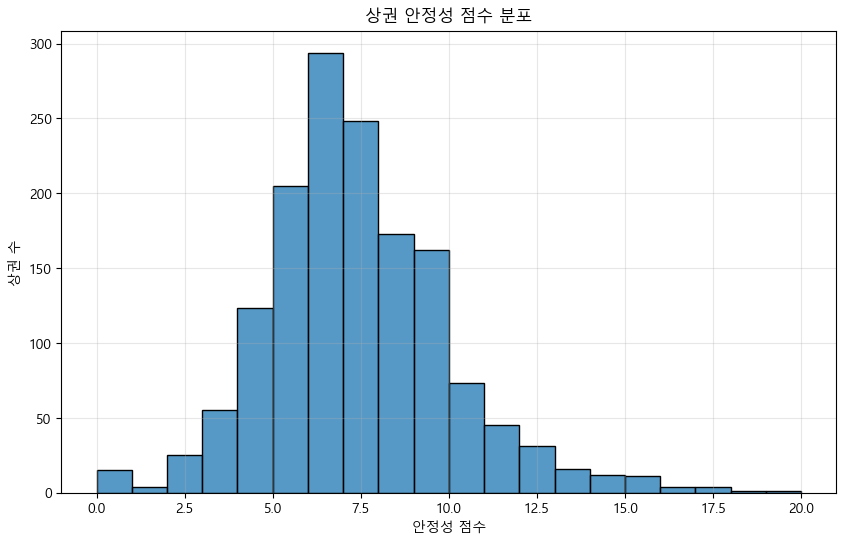

In [102]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏

In [105]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.4550
Ï£ºÏÑ±Î∂Ñ 2: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.3332


Ï£ºÏÑ±Î∂ÑÍ≥º ÏõêÎûò Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

üîç Ï£ºÏÑ±Î∂ÑÍ≥º ÏõêÎûò Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
                PC1       PC2
ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±  0.825897 -0.008379
Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±  0.824837 -0.051357
3ÎÖÑÏÉùÏ°¥Î•†      0.049356  0.998487


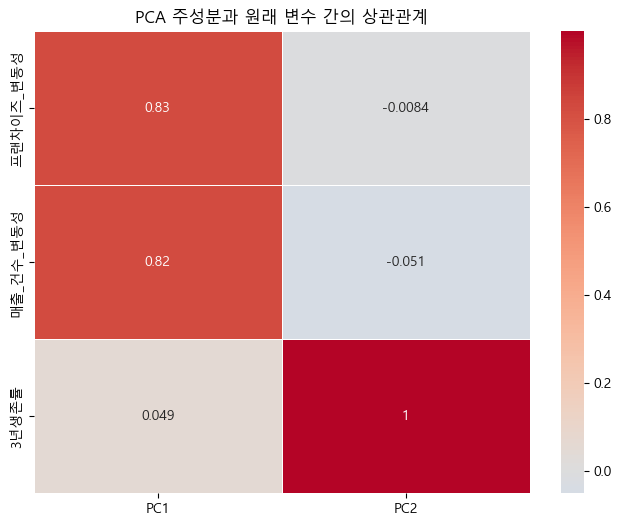

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†']
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features]

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df_selected.groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# ÌëúÏ§ÄÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 2Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÏôÄ Ï£ºÏÑ±Î∂Ñ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
correlation_matrix_pc1 = pd.DataFrame(scaled_features, columns=features).corrwith(pca_df['PC1'])
correlation_matrix_pc2 = pd.DataFrame(scaled_features, columns=features).corrwith(pca_df['PC2'])

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≤∞Í≥º Ìï©ÏπòÍ∏∞
correlation_df = pd.DataFrame({
    'PC1': correlation_matrix_pc1,
    'PC2': correlation_matrix_pc2
})

# Í≤∞Í≥º Ï∂úÎ†•
print("üîç Ï£ºÏÑ±Î∂ÑÍ≥º ÏõêÎûò Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
print(correlation_df)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("PCA Ï£ºÏÑ±Î∂ÑÍ≥º ÏõêÎûò Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()

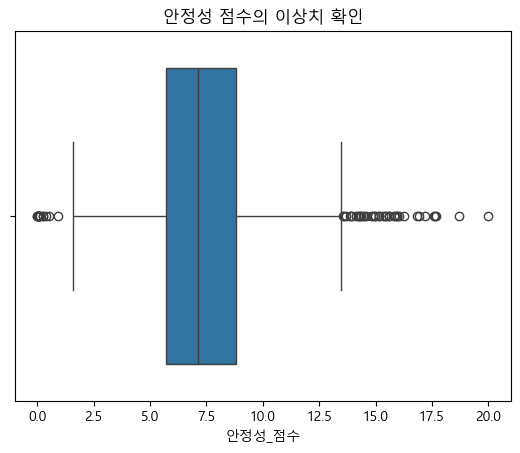

In [107]:
sns.boxplot(x=result_df['ÏïàÏ†ïÏÑ±_Ï†êÏàò'])
plt.title("ÏïàÏ†ïÏÑ± Ï†êÏàòÏùò Ïù¥ÏÉÅÏπò ÌôïÏù∏")
plt.show()

Ï£ºÏÑ±Î∂ÑÏù¥ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏôÄ ÏñºÎßàÎÇò ÏùºÍ¥ÄÏÑ±Ïù¥ ÏûàÎäîÏßÄ ÌèâÍ∞Ä

In [108]:
# ÏïàÏ†ïÏÑ± Ï†êÏàòÏôÄ ÌèêÏóÖÎ•† Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
real_data = df_selected[['ÏÉÅÍ∂åÎ™Ö', '3ÎÖÑÏÉùÏ°¥Î•†']]  # Ïã§Ï†ú ÏÉùÏ°¥Î•† Îç∞Ïù¥ÌÑ∞
merged_df = result_df.merge(real_data, on='ÏÉÅÍ∂åÎ™Ö')

correlation = merged_df['ÏïàÏ†ïÏÑ±_Ï†êÏàò'].corr(merged_df['3ÎÖÑÏÉùÏ°¥Î•†'])
print("ÏïàÏ†ïÏÑ± Ï†êÏàòÏôÄ Ïã§Ï†ú ÏÉùÏ°¥Î•† Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò:", correlation)

ÏïàÏ†ïÏÑ± Ï†êÏàòÏôÄ Ïã§Ï†ú ÏÉùÏ°¥Î•† Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.5721245574207015


### ÌëúÏ§ÄÌôî => PCA(Ï£ºÏÑ±Î∂Ñ2Í∞ú) => ÎØºÎß•Ïä§ -ÏÇ¨Ïö© Î≥ÄÏàò 6Í∞úÎ°ú-

In [109]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò', 'Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†', '5ÎÖÑÏÉùÏ°¥Î•†']

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò (Ïà´ÏûêÎ°ú Î≥ÄÌôò, Î≥ÄÌôò Î∂àÍ∞ÄÎä•Ìïú Í∞íÏùÄ NaN Ï≤òÎ¶¨)
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features].groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# ÌëúÏ§ÄÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 2Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
explained_variance = pca.explained_variance_ratio_

# Ï£ºÏÑ±Î∂Ñ Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
weighted_pca_score = (pca_result[:, 0] * explained_variance[0]) + (pca_result[:, 1] * explained_variance[1])
weighted_pca_score = weighted_pca_score.reshape(-1, 1)

# Min-Max Ïä§ÏºÄÏùºÎßÅ (0~20 Î≤îÏúÑ)
minmax_scaler = MinMaxScaler(feature_range=(0, 20))
final_scores = minmax_scaler.fit_transform(weighted_pca_score)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'ÏÉÅÍ∂åÎ™Ö': df_selected['ÏÉÅÍ∂åÎ™Ö'],
    'ÏïàÏ†ïÏÑ±_Ï†êÏàò': final_scores.flatten()
})

# ÏïàÏ†ïÏÑ± Ï†êÏàò Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
result_df = result_df.sort_values('ÏïàÏ†ïÏÑ±_Ï†êÏàò', ascending=False)

# Ï∂úÎ†•
print(result_df)

              ÏÉÅÍ∂åÎ™Ö     ÏïàÏ†ïÏÑ±_Ï†êÏàò
914          Ïã†ÎÖºÌòÑÏó≠  20.000000
1381          ÏΩîÏóëÏä§  17.049400
1236          Ïû†Ïã§Ïó≠  16.181581
36    Í∞ïÎÇ® ÎßàÏù¥Ïä§ Í¥ÄÍ¥ëÌäπÍµ¨  15.220791
192         Íµ¨ÏùòÏÇ¨Í±∞Î¶¨  15.030908
...           ...        ...
1468       ÌôîÍ≥ÑÏó≠ 2Î≤à   0.448300
1094    ÏòÅÎì±Ìè¨Î≥∏ÎèôÏ£ºÎØºÏÑºÌÑ∞   0.445956
1441       ÌóåÏù∏Í∞ÄÍµ¨Îã®ÏßÄ   0.296900
966     Ïã†Ïõî3Îèô Í≥®Î™©ÏãúÏû•   0.272437
631    Î∂ÅÌïúÏÇ∞Î≥¥Íµ≠Î¨∏Ïó≠ 1Î≤à   0.000000

[1502 rows x 2 columns]


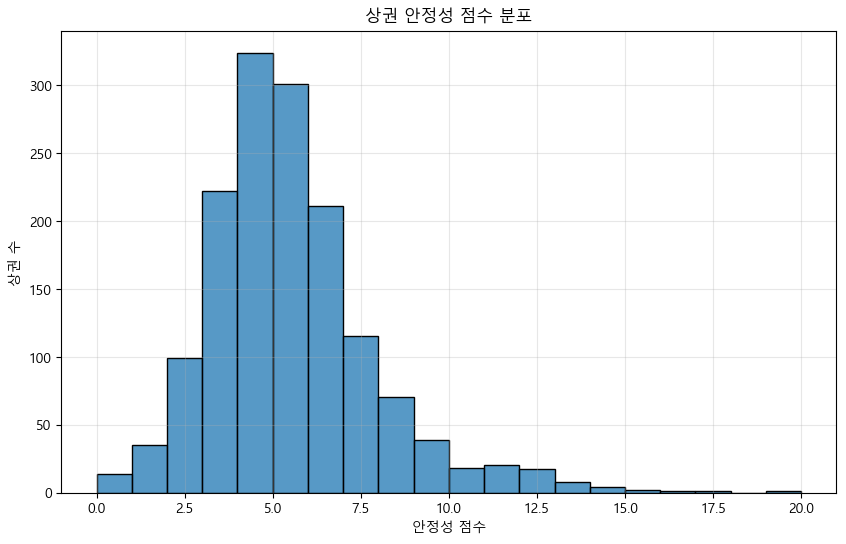

In [110]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
sns.histplot(data=result_df, x='ÏïàÏ†ïÏÑ±_Ï†êÏàò', bins=20)

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÏÉÅÍ∂å ÏïàÏ†ïÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïàÏ†ïÏÑ± Ï†êÏàò')
plt.ylabel('ÏÉÅÍ∂å Ïàò')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, alpha=0.3)

plt.show()

ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏

In [111]:
import numpy as np

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú® ÌôïÏù∏
explained_variance = pca.explained_variance_ratio_

# Í≤∞Í≥º Ï∂úÎ†•
for i, var in enumerate(explained_variance):
    print(f"Ï£ºÏÑ±Î∂Ñ {i+1}: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = {var:.4f}")

Ï£ºÏÑ±Î∂Ñ 1: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.2874
Ï£ºÏÑ±Î∂Ñ 2: ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú® = 0.1976


Ï£ºÏÑ±Î∂ÑÍ≥º ÏõêÎûò Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

üîç Ï£ºÏÑ±Î∂ÑÍ≥º ÏõêÎûò Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
                PC1       PC2
ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±  0.693717 -0.045951
Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò -0.023307 -0.457865
Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±  0.755396  0.096067
Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±  0.814301 -0.020235
3ÎÖÑÏÉùÏ°¥Î•†      0.039952  0.675615
5ÎÖÑÏÉùÏ°¥Î•†     -0.086846  0.712500


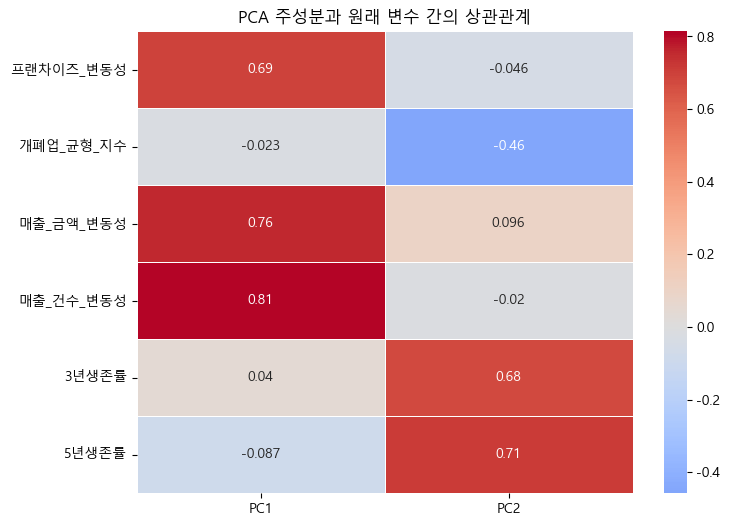

In [112]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\m\Desktop\Î≥ÄÏàò ÏÉùÏÑ±Ïö© Îç∞Ïù¥ÌÑ∞\Îß§Ï∂úÎ≥ÄÏàò_20192.csv"

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, encoding="utf-8")

# 2024ÎÖÑ 2Î∂ÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df = df[df['Ïó∞Î∂ÑÍ∏∞'] == 20242]

# ÏÇ¨Ïö©Ìï† ÌäπÏÑ±(Î≥ÄÏàò) Î™©Î°ù
features = ['ÌîÑÎûúÏ∞®Ïù¥Ï¶à_Î≥ÄÎèôÏÑ±', 'Í∞úÌèêÏóÖ_Í∑†Ìòï_ÏßÄÏàò', 'Îß§Ï∂ú_Í∏àÏï°_Î≥ÄÎèôÏÑ±', 'Îß§Ï∂ú_Í±¥Ïàò_Î≥ÄÎèôÏÑ±', '3ÎÖÑÏÉùÏ°¥Î•†', '5ÎÖÑÏÉùÏ°¥Î•†']

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò (Ïà´ÏûêÎ°ú Î≥ÄÌôò, Î≥ÄÌôò Î∂àÍ∞ÄÎä•Ìïú Í∞íÏùÄ NaN Ï≤òÎ¶¨)
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# ÏÉÅÍ∂åÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
df_selected = df[['ÏÉÅÍ∂åÎ™Ö'] + features].groupby('ÏÉÅÍ∂åÎ™Ö')[features].mean().reset_index()

# Í≤∞Ï∏°Ïπò(NaN) Ï≤òÎ¶¨: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_selected[features] = df_selected[features].fillna(df_selected[features].median())

# ÌëúÏ§ÄÌôî (Z-score Î≥ÄÌôò)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[features])

# PCA ÏàòÌñâ (Ï£ºÏÑ±Î∂Ñ 2Í∞ú ÏÑ†ÌÉù)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÏôÄ Ï£ºÏÑ±Î∂Ñ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
correlation_matrix_pc1 = pd.DataFrame(scaled_features, columns=features).corrwith(pca_df['PC1'])
correlation_matrix_pc2 = pd.DataFrame(scaled_features, columns=features).corrwith(pca_df['PC2'])

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≤∞Í≥º Ìï©ÏπòÍ∏∞
correlation_df = pd.DataFrame({
    'PC1': correlation_matrix_pc1,
    'PC2': correlation_matrix_pc2
})

# Í≤∞Í≥º Ï∂úÎ†•
print("üîç Ï£ºÏÑ±Î∂ÑÍ≥º ÏõêÎûò Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
print(correlation_df)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("PCA Ï£ºÏÑ±Î∂ÑÍ≥º ÏõêÎûò Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()

ÏïàÏ†ïÏÑ± Ï†êÏàò Ïù¥ÏÉÅÏπò ÌôïÏù∏

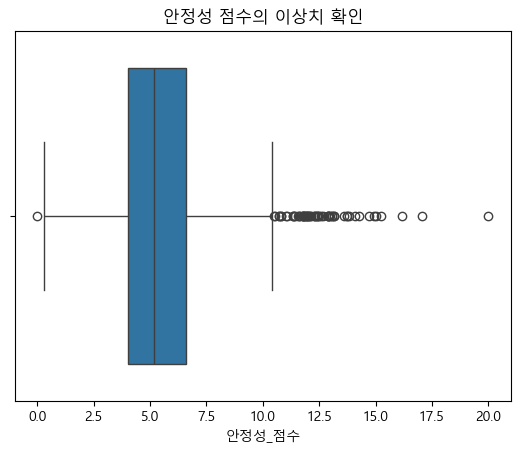

In [113]:
sns.boxplot(x=result_df['ÏïàÏ†ïÏÑ±_Ï†êÏàò'])
plt.title("ÏïàÏ†ïÏÑ± Ï†êÏàòÏùò Ïù¥ÏÉÅÏπò ÌôïÏù∏")
plt.show()

Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏôÄÏùò ÏùºÍ¥ÄÏÑ± ÌôïÏù∏

In [114]:
# ÏïàÏ†ïÏÑ± Ï†êÏàòÏôÄ ÌèêÏóÖÎ•† Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
real_data = df_selected[['ÏÉÅÍ∂åÎ™Ö', '3ÎÖÑÏÉùÏ°¥Î•†']]  # Ïã§Ï†ú ÏÉùÏ°¥Î•† Îç∞Ïù¥ÌÑ∞
merged_df = result_df.merge(real_data, on='ÏÉÅÍ∂åÎ™Ö')

correlation = merged_df['ÏïàÏ†ïÏÑ±_Ï†êÏàò'].corr(merged_df['3ÎÖÑÏÉùÏ°¥Î•†'])
print("ÏïàÏ†ïÏÑ± Ï†êÏàòÏôÄ Ïã§Ï†ú ÏÉùÏ°¥Î•† Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò:", correlation)

ÏïàÏ†ïÏÑ± Ï†êÏàòÏôÄ Ïã§Ï†ú ÏÉùÏ°¥Î•† Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.369238882327566
